In [1]:
import datapreprocessing as dapre
import dataset as dal
from torch.utils.data import DataLoader,Dataset
import torch
from monai.networks.nets import UNet
import monai
from monai.networks.nets import unetr
from monai.losses import DiceLoss, DiceCELoss
import trainer

(4536, 4704, 3)


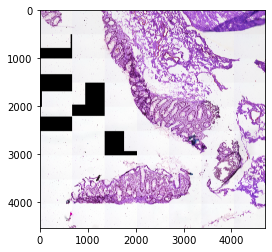

Shaped series: axes do not match shape


(4536, 4704)


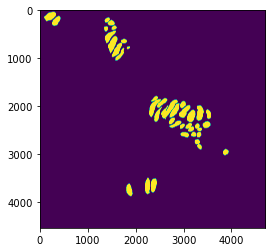

In [2]:
img=dapre.getImg(dapre.TRAIN_IMAGES_PATHLIST[2],True)
msk=dapre.getImg(dapre.TRAIN_MASK_PATHLIST[2],True)

In [3]:
PATCH_SHAPE=(512,512)
PATCH_STRIDE=(256,256)
dapre.generatePatches(dapre.TRAIN_PATH_ORIG,dapre.TRAIN_IMGPATCH_SAVEPATH,dapre.TRAINMASK_ORIG,dapre.TRAIN_MASKPATCH_SAVEPATH,PATCH_SHAPE,PATCH_STRIDE)

Shaped series: axes do not match shape


Colonic_crypt_dataset/train/CL_HandE_1234_B004_bottomright.tiff


Shaped series: axes do not match shape


Colonic_crypt_dataset/train/CL_HandE_1234_B004_topleft.tiff


Shaped series: axes do not match shape


Colonic_crypt_dataset/train/CL_HandE_1234_B004_topright.tiff


Shaped series: axes do not match shape


Colonic_crypt_dataset/train/HandE_B005_CL_b_RGB_bottomright.tiff


Shaped series: axes do not match shape


Colonic_crypt_dataset/train/HandE_B005_CL_b_RGB_topleft.tiff


In [4]:
dapre.generatePatches(dapre.TEST_PATH_ORIG,dapre.TEST_IMGPATCH_SAVEPATH,dapre.TESTMASK_ORIG,dapre.TEST_MASKPATCH_SAVEPATH,PATCH_SHAPE,PATCH_STRIDE)

Shaped series: axes do not match shape


Colonic_crypt_dataset/test/CL_HandE_1234_B004_bottomleft.tiff


Shaped series: axes do not match shape


Colonic_crypt_dataset/test/HandE_B005_CL_b_RGB_bottomleft.tiff


In [5]:
import model_config
model = UNet(dimensions=3,
            in_channels=4,
            out_channels=3,
            channels=(16, 32, 64, 128, 256),
            strides=(2, 2, 2, 2),
            num_res_units=2,
            )
md=model_config.modelconf(MODEL=model)
obj=trainer.model_trainer(conf=md,trainloader=None,testloader=None)
print(obj.conf.DEVICE)
md.DEVICE="gpu"
print(obj.conf.DEVICE)


cpu
gpu
